<a href="https://colab.research.google.com/github/T-art-coder/Python-notebooks/blob/main/Gradient_Descent_for_Functions_of_Two_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries

In [4]:
%matplotlib inline  

from numpy import *
from numpy.linalg import norm

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
#from matplotlib.pyplot import *
from numpy import *


### Define a function and plot a 3D plot and a contour plot.

In [26]:
def f(x, y):
    r = sqrt(x**2 + y**2)
    return -.4 + (x*2+15)/30. + (y**3+15)/40.+1.5*sin(r)


x = arange(-15, 15, 0.25)
y = arange(-15, 15, 0.25)
X, Y = meshgrid(x, y)
R = sqrt(X**2 + Y**2)
Z = -.4 + (X+15)/30. + (Y+15)/40.+.5*sin(R) 

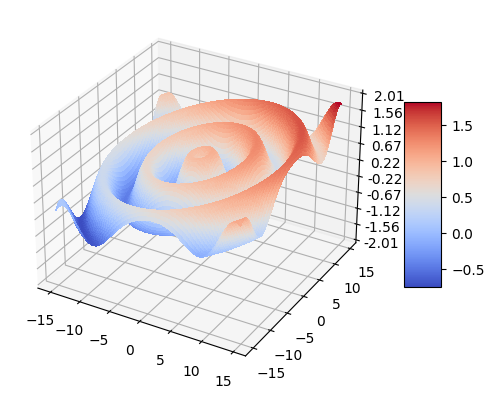

In [27]:
fig = figure(3)
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-2.01, 2.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
show()   

### Contour plot of the function

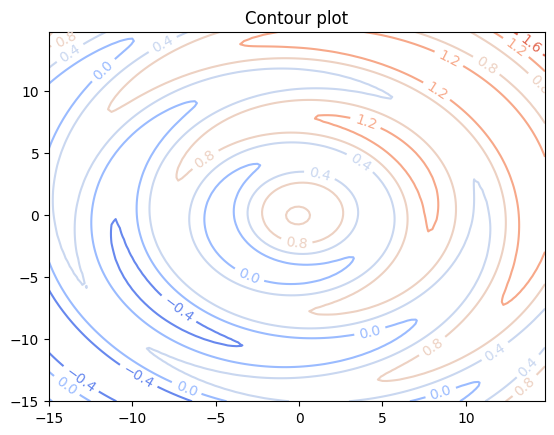

In [28]:
x = arange(-15, 15, 0.25)
y = arange(-15, 15, 0.25)
X, Y = meshgrid(x, y)
R = sqrt(X**2 + Y**2)
Z = -.4 + (X+15)/30. + (Y+15)/40.+.5*sin(R)

figure(1)
CS = contour(X, Y, Z, cmap=cm.coolwarm)
clabel(CS, inline=1, fontsize=10)
title('Contour plot')

show()

In [29]:
## functions for gradient calculation
def drdx(x, y, r):
    return (.5*(x**2 + y**2)**-.5)*(2*x)

def drdy(x, y, r):
    return (.5*(x**2 + y**2)**-.5)*(2*y)
    
def dfdx(x, y):
    r = sqrt(x**2 + y**2)
    return 1/30. + .5*cos(r)*drdx(x, y, r)
    
def dfdy(x, y):
    r = sqrt(x**2 + y**2)
    return 1/40. + .5*cos(r)*drdy(x, y, r)
    
def gradf(x, y):
    return array([dfdx(x, y), dfdy(x, y)]) 

In [30]:
def grad_descent2(f, gradf, init_t, alpha):
    EPS = 1e-5
    prev_t = init_t-10*EPS
    t = init_t.copy()
    
    max_iter = 1000
    iter = 0
    while norm(t - prev_t) > EPS and iter < max_iter:
        prev_t = t.copy()
        t -= alpha*gradf(t[0], t[1])
        print (t, f(t[0], t[1]), gradf(t[0], t[1]))
        iter += 1
    
    return t

In [32]:
# initialize a starting point
f(10., 8.)

14.298042645555903

In [31]:
grad_descent2(f, gradf, array([10.0, 8.0]), 0.01)

[9.99587412 7.99671596] 14.274322279572317 [0.413072   0.32879157]
[9.9917434  7.99342804] 14.250577210936198 [0.41354556 0.32917105]
[9.98760794 7.99013633] 14.226808238646669 [0.41400905 0.32954248]
[9.98346785 7.98684091] 14.203016166646327 [0.41446241 0.3299058 ]
[9.97932323 7.98354185] 14.179201803702249 [0.41490557 0.33026098]
[9.97517417 7.98023924] 14.1553659632849 [0.41533849 0.33060795]
[9.97102078 7.97693316] 14.131509463445099 [0.4157611  0.33094668]
[9.96686317 7.97362369] 14.107633126688969 [0.41617334 0.33127712]
[9.96270144 7.97031092] 14.083737779851042 [0.41657517 0.33159923]
[9.95853569 7.96699493] 14.059824253965418 [0.41696652 0.33191296]
[9.95436602 7.9636758 ] 14.035893384135099 [0.41734736 0.33221828]
[9.95019255 7.96035362] 14.01194600939955 [0.41771762 0.33251514]
[9.94601537 7.95702847] 13.987982972600491 [0.41807726 0.3328035 ]
[9.9418346  7.95370043] 13.964005120245996 [0.41842622 0.33308333]
[9.93765034 7.9503696 ] 13.940013302372913 [0.41876447 0.33335458

array([8.52620525, 6.83732121])